# Gradient Descent for Linear Regression

This function takes a dataframe (df) with any n of x-features (variables), the learning rate (alpha), and regularization rate lambda (lamb)  

Create 2 empty lists outside the function to store cost function values/recursion and track updates to the constants (thetas):

j_list = [  ]

theta_list = [  ]

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
df = pd.read_csv('ex1data2.txt',sep=",",names=('x1','x2','y'))
df.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
j_list = []
theta_list = []
def linear_reg_gd(df, alpha, lamb):
    
    # Initiate with tranposed theta. theta_t = arr[1,1,1...1] with a length of x-features, including x0.
    if len(theta_list)>0:
        theta_t = np.array(theta_list[-1]).reshape(1,len(df.columns))
    else:
        theta_t = np.ones(len(df.columns)).reshape(1,len(df.columns))
        theta_list.append([1]*len(df.columns))

    # xy_list = [(x1, x2, ... xn, y)...] 
    xy_list = [list(item[1:]) for item in df.itertuples()]
    
    # Add x0 = 1 (bias term) to every data point.  xy_list becomes [(1,x1,x2,...xn,y), ...] 
    for point in xy_list:
        point.insert(0,1) 
    
    # x_features = [(1,x1,x2...xn), (1,x1,x2...xn)...]
    x_features = [coord[0:-1] for coord in xy_list]
    
    # Normalize x_features (x0,x1,x2) <--- start at x1 (df[0]), because x0 = bias term 1 
    # (x1-x1mean)/x1.stdev
    for x_set in x_features:
        i=0
        for x in x_set[1:]:
            x = (x - statistics.mean(df[df.columns[i]])) / statistics.stdev(df[df.columns[i]])
            x_set[i+1] = x
            i=i+1
    
    # y_class = [y1, y2...yn]
    y_class = [coord[-1] for coord in xy_list]
    
    # Cost Function J
    errorsq_list = []
    i = 0
    for x_set in x_features:
        # math domain error if 1-sig_fn = 0
        errorsq_term = (np.matmul(theta_t,np.array(x_set).reshape(len(df.columns),1)) - y_class[i])**2
        errorsq_list.append(errorsq_term)
        i = i+1
    j = (1/(2*len(df)))*sum(errorsq_list)
    j_list.append(j)

    # Gradient Descent
    diff_list = []
    i=0
    for x_set in x_features:
        error_term = np.matmul(theta_t,np.array(x_set).reshape(len(df.columns),1))-y_class[i]
        diff_list.append(error_term[0][0])
        i=i+1
        
    # [(error_term(1)x0(1)), (error_term(1)x1(1)), (error_term(1)x2(1)), (error_term(2)x0(2))...]
    diff_partial_x = []
    i=0
    for x_set in x_features:
        for x in x_set:
            diff_partial_x.append(diff_list[i]*x)
        i=i+1
        
    # Update thetas (need additional indexing for iterating through a numpy array)
    updated_thetas = []
    i = 0 
    
    # Add every error term with the same partial x
    for theta in theta_t[0]:
        theta = (theta*(1-(alpha*lamb/len(df))))-(alpha/len(df))*sum(diff_partial_x[i::len(df.columns)])          
        updated_thetas.append(theta)
        i = i + 1
    # De-regularize theta[0] as we don't want to penalize theta_0.   
    updated_thetas[0] = updated_thetas[0] + (alpha/len(df))*sum(diff_partial_x[0::len(df.columns)])
    updated_thetas[0] = updated_thetas[0]/(1-(alpha*lamb/len(df))) - (alpha/len(df))*sum(diff_partial_x[0::len(df.columns)])
    
    # Add updated thetas to theta_list
    theta_list.append(updated_thetas)
    
    # Recursively run until cost is minimized
    if len(j_list)<2: 
        linear_reg_gd(df, alpha, lamb)
    elif len(j_list)>=2 and j_list[-1]<j_list[-2]:
        linear_reg_gd(df, alpha, lamb)
    elif len(j_list)>=2 and j_list[-1]>=j_list[-2]:
        print(f'There were {len(j_list)} recursive cycles before the cost was minimized to {j_list[-1]}.')
        print(f'Updated thetas: {theta_list[-1]}')

        # Report results
        x0 = [x_set[0] for x_set in x_features]
        x1 = [x_set[1] for x_set in x_features]
        x2 = [x_set[2] for x_set in x_features]            
        cost = [j[0][0] for j in j_list]
        x_cycles = np.arange(0,len(j_list),1)

        # Create lists of predicted Y values using the new hypothesis
        
        theta_init = np.ones(shape=(1,len(df.columns)))
        initial_line = []
        for x_set in x_features:
            x_set = np.array(x_set).reshape(len(df.columns),1)
            initial_line.append(np.matmul(theta_init,x_set))
        initial_line = np.array(initial_line).reshape(1,len(df))

        mid_thetas = np.array(theta_list[3]).reshape(1,len(df.columns))
        mid_line = []
        for x_set in x_features:
            x_set = np.array(x_set).reshape(len(df.columns),1)
            mid_line.append(np.matmul(mid_thetas,x_set))
        mid_line = np.array(mid_line).reshape(1,len(df))

        predicted_y = []
        for x_set in x_features:
            updated_thetas = np.array(updated_thetas).reshape(1,len(df.columns))
            x_set = np.array(x_set).reshape(len(df.columns),1)
            predicted_y.append(np.matmul(updated_thetas,x_set))
        predicted_y = np.array(predicted_y).reshape(1,len(df))
        
        if len(df.columns)==3:
            # Plot the (X1, X2, predicted_Y) with the new h(x)
            fig = plt.figure(figsize=(14,6))
            fig.subplots_adjust(wspace=0.3)

            ax = fig.add_subplot(1,2,1,projection='3d')
            p = ax.scatter(x1, x2, y_class, linewidth=1, color='r')
            p = ax.plot_wireframe(x1,x2,predicted_y)
            p = ax.plot_wireframe(x1,x2,initial_line)
            p = ax.plot_wireframe(x1,x2,mid_line)
            ax.set_xlabel("X1")
            ax.set_ylabel("X2")
            ax.set_zlabel("Y")
            ax.set_title("Line/Mesh of Best Fit")

            # Plot Cost Function J(t0,t1) vs. Cycles
            x_cycles = np.arange(0,len(j_list),1)
            ax = fig.add_subplot(1,2,2)
            ax.set_xlabel('Cycles')
            ax.set_ylabel('J')
            ax.set_title('Cost per Cycle')
            ax.plot(x_cycles, cost, linewidth=1)

        elif len(df.columns)==2:
            # Plot the (X1, X2, predicted_Y) with the new h(x)
            fig = plt.figure(figsize=(14,6))
            fig.subplots_adjust(wspace=0.3)

            ax = fig.add_subplot(1,2,1)
            p = ax.scatter(x1,y_class,linewidth=1,color='r')
            p = ax.plot(x1,predicted_y)
            p = ax.plot(x1,initial_line)
            p = ax.plot(x1,mid_line)
            ax.set_xlabel("X1")
            ax.set_ylabel("Y")
            ax.set_title("Line of best fit")

            # Plot Cost Function J(t0,t1) vs. Cycles
            x_cycles = np.arange(0,len(j_list),1)
            ax = fig.add_subplot(1,2,2)
            ax.set_xlabel('Cycles')
            ax.set_ylabel('J')
            ax.set_title('Cost per Cycle')
            ax.plot(x_cycles, cost, linewidth=1)

There were 325 recursive cycles before the cost was minimized to [[2.04734184e+09]].
Updated thetas: [340412.659574468, 107155.83878156329, -4603.395978581559]


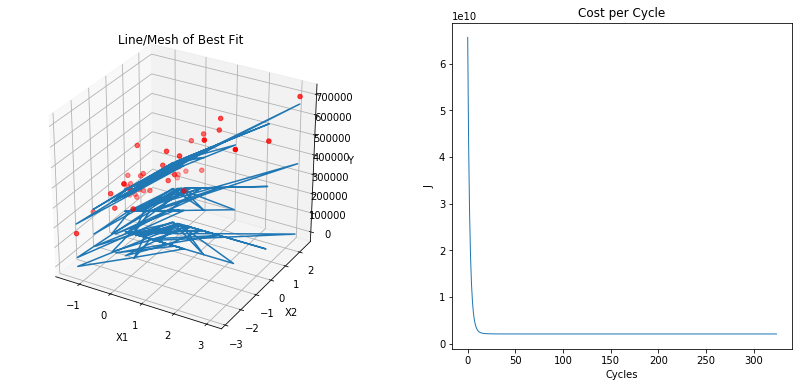

In [4]:
j_list = []
theta_list = []
linear_reg_gd(df, alpha=0.2, lamb=1)